In [1]:
import math

from common import *
from experiment import *
from data import RawData, PlottableData

In [2]:
TREATMENTS = [
    TCPTreatment(cca='cubic', pep=False),
    TCPTreatment(cca='bbr', pep=False),
    QUICTreatment(cca='cubic'),
    QUICTreatment(cca='bbr'),
    QUICTreatment(cca='bbr1'),
]
TCP_CUBIC = TREATMENTS[0]
TCP_BBRV3 = TREATMENTS[1]
QUIC_CUBIC = TREATMENTS[2]
QUIC_BBRV3 = TREATMENTS[3]
QUIC_BBRV1 = TREATMENTS[4]

In [15]:
def make_network_settings(loss, delay, bw):
    networks = []
    for x in loss:
        for y in delay:
            for z in bw:
                networks.append(DirectNetworkSetting(loss=x, delay=y, bw=z))
    return networks

# Execute parameter space for each congestion control algorithm

In [28]:
# Plot function
def plot_3d_heatmap(data, xs, ys, zs):
    assert len(data.treatments) == 1
    treatment = data.treatments[0]
    loss  = {x: i for i, x in enumerate(xs)}
    delay = {y: j for j, y in enumerate(ys)}
    bw    = {z: k for k, z in enumerate(zs)}
    x, y, z = np.meshgrid(xs, ys, zs)

    # Flatten the grid for easier plotting
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()

    # Assign a heatmap value to each point
    # The goodput as a proportion of bottleneck bandwidth
    subdata = data.data[treatment]
    values = [None for _ in range(len(x))]
    for network_setting in data.exp.get_network_settings():
        network_data = subdata[network_setting.label()]
        if len(network_data) == 0:
            continue
        assert len(network_data) == 1

        # Calculate the index for the 3D point
        i = loss[network_setting.get('loss1')]
        j = delay[network_setting.get('delay1')]
        k = bw[network_setting.get('bw1')]
        index = i*len(bw) + j*len(loss)*len(bw) + k

        # Calculate and set the value for that point
        goodput = next(iter(network_data.values())).mean
        value = goodput / network_setting.get('bw1')
        values[index] = value
    
    # Plot the 3D heatmap
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot with colormap
    sc = ax.scatter(list(map(float, x)), y, z, c=values, cmap='viridis', s=50, alpha=0.8)

    # Add color bar for the heatmap
    cbar = fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label('Thoughput / Bandwidth')
    
    # Add axis labels
    ax.set_xlabel('Loss')
    ax.set_ylabel('Delay')
    ax.set_zlabel('Bandwidth')
    ax.set_title(treatment)
    
    # Show plot
    plt.show()

In [24]:
def run_experiment_and_plot_3d_heatmap(treatment, loss, delay, bw, execute=False, num_trials=1):
    data_size = lambda bw: int(10*1000000*bw/8)  # 10x the bottleneck bandwidth
    loss = list(map(str, loss))
    network_settings = make_network_settings(loss=loss, delay=delay, bw=bw)
    data_sizes = [data_size(ns.get('bw1')) for ns in network_settings]

    # Create experiment
    exp = Experiment(num_trials, [treatment], network_settings, data_sizes)
    raw_data = RawData(exp, execute=execute, cartesian=False)

    # Plot data
    metric = 'throughput_mbps'
    plottable_data = PlottableData(raw_data, metric=metric)
    plot_3d_heatmap(plottable_data, xs=loss, ys=delay, zs=bw)

MISSING: sudo -E python3 emulation/main.py --bw1 500 --delay1 100 --loss1 4 --topology direct -t 1 --label tcp_bbr tcp -cca bbr -n 625000000


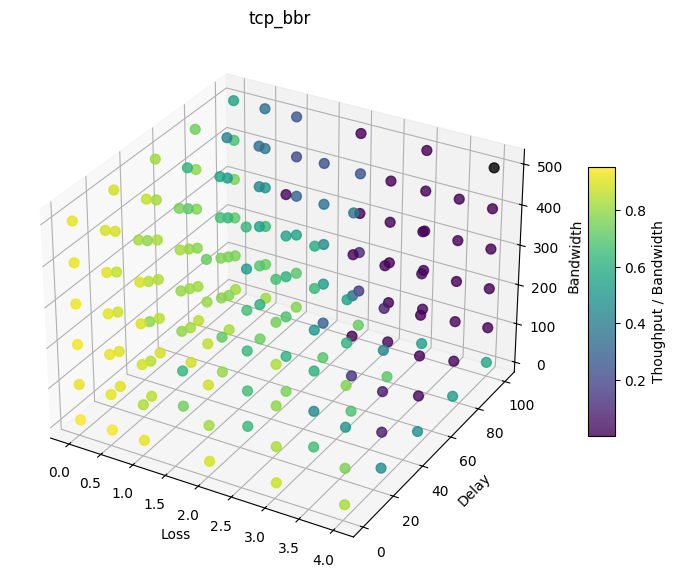

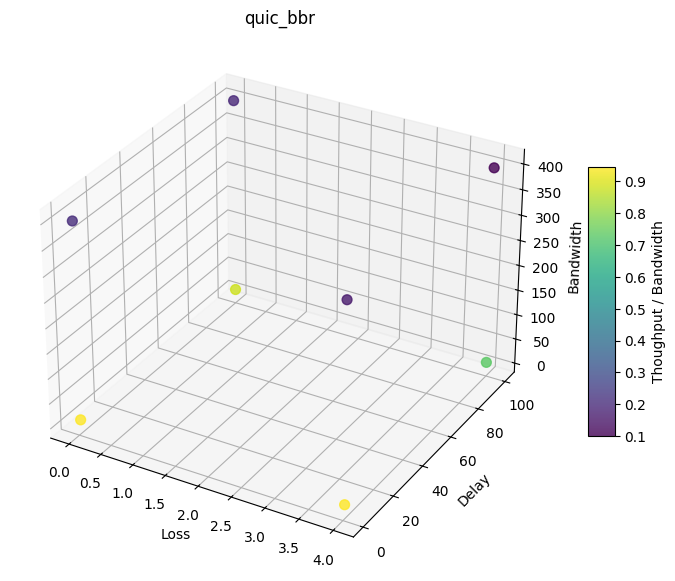

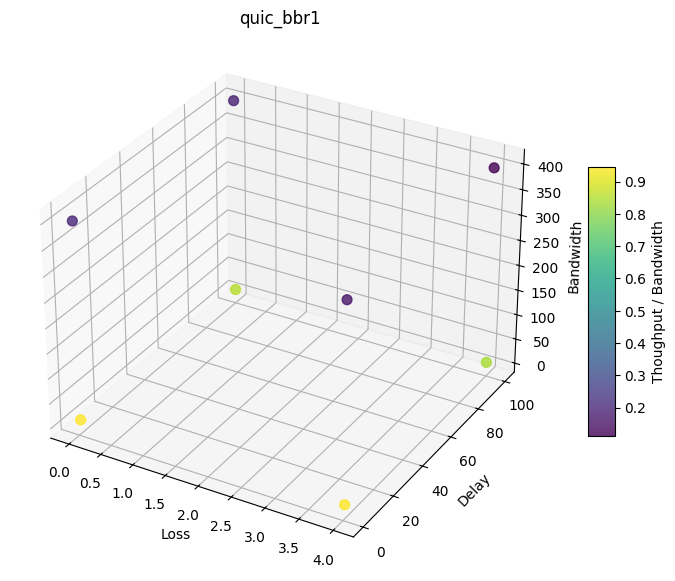

In [30]:
run_experiment_and_plot_3d_heatmap(
    treatment=TCP_BBRV3,
    loss=[0, 0.5, 1, 2, 3, 4],
    delay=[1, 25, 50, 75, 100], #, 150, 200, 250]
    bw=[10, 100, 200, 300, 400, 500], #, 1000]
    execute=False,
)

run_experiment_and_plot_3d_heatmap(
    treatment=QUIC_BBRV3,
    loss=[0, 0.5, 1, 2, 3, 4],
    delay=[1, 25, 50, 75, 100],
    # bw=[10, 100, 200, 300, 400, 500],
    bw=[10, 100, 200, 300, 400],
    execute=True,
)

run_experiment_and_plot_3d_heatmap(
    treatment=QUIC_BBRV1,
    loss=[0, 0.5, 1, 2, 3, 4],
    delay=[1, 25, 50, 75, 100],
    # bw=[10, 100, 200, 300, 400, 500],
    bw=[10, 100, 200, 300, 400],
    execute=True,
)

2
sudo -E python3 emulation/main.py --bw1 10 --delay1 50 --loss1 0.25 --topology direct -t 1 --label tcp_cubic tcp -cca cubic -n 12500000 16.72606086730957
sudo -E python3 emulation/main.py --delay1 50 --loss1 0.25 --topology direct -t 1 --label tcp_cubic tcp -cca cubic -n 125000000 160.98674297332764


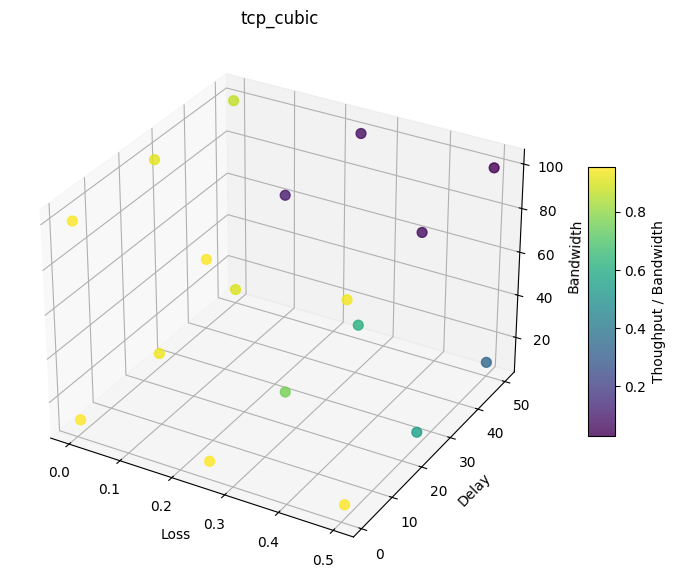

In [33]:
run_experiment_and_plot_3d_heatmap(
    treatment=TCP_CUBIC,
    # loss=[0, 0.25, 0.5, 0.75, 1],
    loss=[0, 0.25, 0.5],
    # delay=[1, 25, 50, 75, 100],
    delay=[1, 25, 50],
    # bw=[10, 100, 200, 300, 400, 500],
    bw=[10, 100],
    execute=True,
)

# run_experiment_and_plot_3d_heatmap(
#     treatment=QUIC_CUBIC,
#     # loss=[0, 0.25, 0.5, 0.75, 1],
#     loss=[0, 1],
#     # delay=[1, 25, 50, 75, 100],
#     delay=[1, 100],
#     # bw=[10, 100, 200, 300, 400, 500],
#     bw=[10, 200],
#     execute=True,
# )